### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset = dataset.sample(frac=1)

### Exploratory Data Análisis

First five rows of the dataset.

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
47,4.6,3.2,1.4,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor


Statistical measures of the dataset.

In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.shape

(150, 5)

It looks like this dataset is pretty well preprocessed. There is no missing values, and all of the variables are numerical

#### Number of classes

In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data visualization with Seaborn

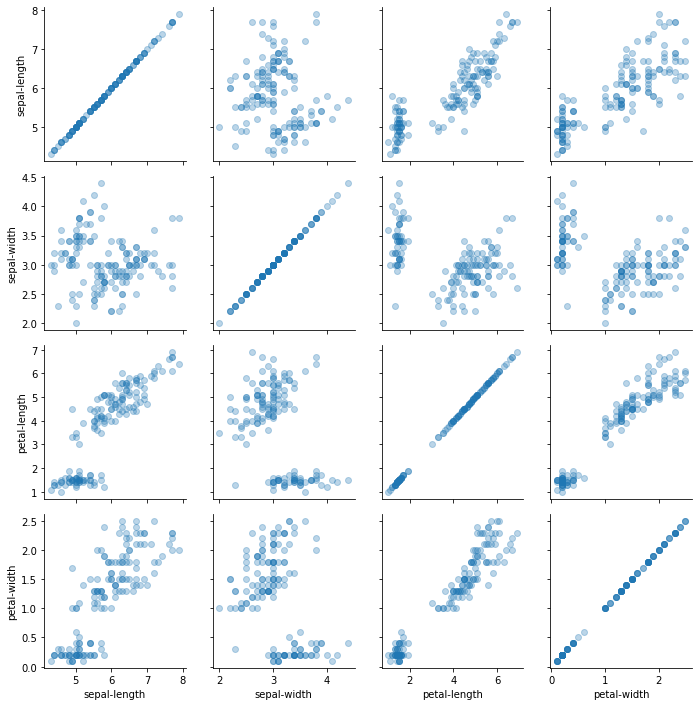

In [8]:
import seaborn as sns

g = sns.PairGrid(dataset)
g.map(plt.scatter,alpha=0.3)

### Validation and Training data

In [9]:
X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

### Model building

In [10]:
models = list()
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Let's evaluate every single model in turn

In [11]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    mean = np.format_float_positional(cv_results.mean(), precision=3)
    std = np.format_float_positional(cv_results.std(), precision=3)
    print(f'{name} : {mean} ({std})')

LR : 0.942 (0.053)
LDA : 0.983 (0.033)
KNN : 0.983 (0.033)
CART : 0.983 (0.033)
NB : 0.983 (0.033)
SVM : 0.983 (0.033)


### Comparing algorithms results

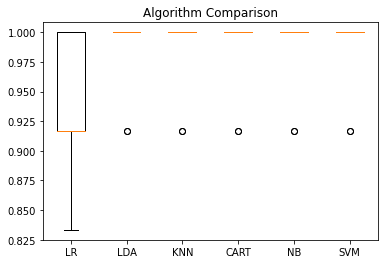

In [17]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Making predictions

In [18]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
acc = np.format_float_positional(accuracy_score(y_test, predictions), precision=3)
print(f'Accuracy: {acc}')

Accuracy: 0.933


In [20]:
print(f'Confusion matrix: ')
print(confusion_matrix(y_test, predictions))

Confusion matrix: 
[[ 8  0  0]
 [ 0 12  1]
 [ 0  1  8]]


In [21]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

